In [1]:
import numpy as np
import pandas as pd
import time
from IPython.display import SVG
from scipy import sparse
from sknetwork.utils import edgelist2adjacency, edgelist2biadjacency
import numpy as np
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.ranking import PageRank, BiPageRank
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

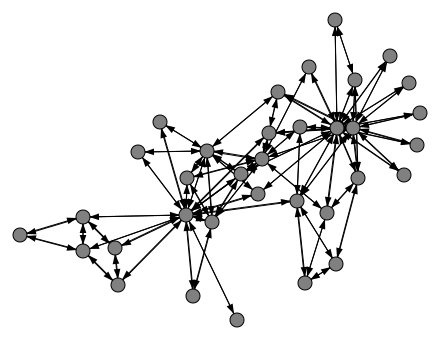

In [7]:
#test

graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
#adjacency = sparse.csr_matrix(adjacency)

image = svg_digraph(adjacency)
SVG(image)

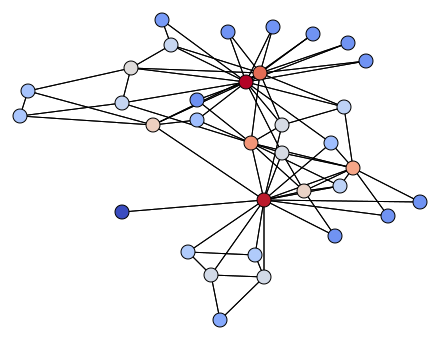

In [3]:
pagerank = PageRank()
scores = pagerank.fit_transform(adjacency)
image = svg_graph(adjacency, position, scores=np.log(scores))
SVG(image)

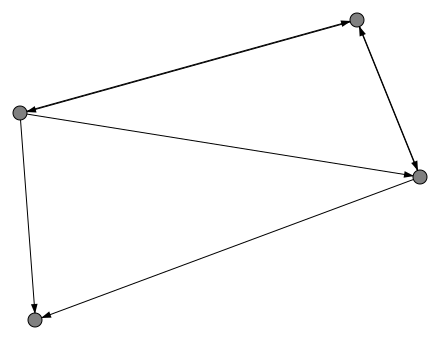

In [4]:
edgelist1 = [(0, 1), (0, 2), (0, 3), (1, 0), (1, 3),(3,1),(3,2)]
adjacency1 = edgelist2adjacency(edgelist1)
image1 = svg_digraph(adjacency1)
SVG(image1)

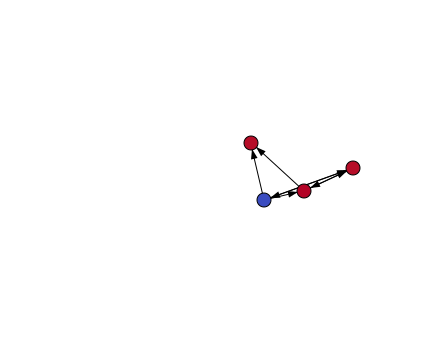

In [5]:
pagerank = PageRank(damping_factor= 0.85,solver = 'diteration',n_iter= 20)
scores = pagerank.fit_transform(adjacency1)
image = svg_digraph(adjacency1, position, scores=np.log(scores))
SVG(image)

In [6]:
scores

array([0.20618555, 0.2646048 , 0.2646048 , 0.26460484], dtype=float32)

In [240]:
def readGraph(file,filename):
    """
    read graph from (i) the list of directed hyperlinks and (ii) the name of the pages corresponding to each node ID
    :return: (list of edges, list of pages, dictionary node_id:node_index)
    """
    time_start = time.time()

    # Reading
    data_edge = pd.read_table(file, skiprows=5,sep='\t', header=None)
    data_page = pd.read_table(filename, skiprows=5, encoding='utf-8',header=None)
    edges = data_edge.values.tolist()
    pages = data_page.values.tolist()
    time_end = time.time()
    
    v = 0
    # dictionary id node:index
    node_to_index = {}
    for node in pages:
        node_to_index[node[0]] = v
        v += 1
    for edge in edges:
        edge[0] = node_to_index[edge[0]]
        edge[1] = node_to_index[edge[1]]
    print("Charge time:", time_end - time_start, "seconds")

    return edges,pages,node_to_index

In [241]:
edges,pages,node_to_index = readGraph('alr21--dirLinks--enwiki-20071018.txt','alr21--pageNum2Name--enwiki-20071018.txt')

Charge time: 42.28674387931824 seconds


In [242]:
adjacen1 = edgelist2adjacency(edges)
#image2 = svg_digraph(adjacen1)
#SVG(image2)

In [243]:
time_start = time.time()
pagerank = PageRank(damping_factor= 0.85,solver = 'diteration',n_iter= 40)
scores2 = pagerank.fit_transform(adjacen1)
time_end = time.time()
print("pagerank time:", time_end - time_start, "seconds")
#image = svg_digraph(adjacen1, position, scores=np.log(scores2))
#SVG(image)

pagerank time: 7.758788824081421 seconds


In [244]:
#scores2

In [245]:
def print_highest_lowest_values(page_rank, pages):
    """
    print the 5 highest page rank value with id and name of page and the 5 lowest ones
    :param page_rank: [page_rank_value]
    :param pages: [[id, 'name']]
    :return: nothing
    """
    print("Top 5 highest page rank nodes:")
    t = page_rank.tolist()
    for _ in range(5):
        number = max(t)
        if number >= 0:
            index = t.index(number)
            name = pages[index][1]
            node = pages[index][0]
            print("ID:", node, "Name:", name, "Page Rank value:", number)
            t[index] = -1
    print("Top 5 lowest page rank nodes:")
    t = page_rank.tolist()
    for _ in range(5):
        number = min(t)
        if number <= 1:
            index = t.index(number)
            name = pages[index][1]
            node = pages[index][0]
            print("ID:", node, "Name:", name, "Page Rank value: ", number)
            t[index] = 2

In [246]:
 print_highest_lowest_values(scores2,pages)

Top 5 highest page rank nodes:
ID: 3434750 Name: United States Page Rank value: 0.0036353713367134333
ID: 31717 Name: United Kingdom Page Rank value: 0.0015882686711847782
ID: 11867 Name: Germany Page Rank value: 0.0013616762589663267
ID: 36165 Name: 2007 Page Rank value: 0.001359662739560008
ID: 36164 Name: 2006 Page Rank value: 0.0013550956500694156
Top 5 lowest page rank nodes:
ID: 632 Name: Aberdeen (disambiguation) Page Rank value:  7.344605990056152e-08
ID: 679 Name: Animal (disambiguation) Page Rank value:  7.344605990056152e-08
ID: 951 Name: Antigua and Barbuda Page Rank value:  7.344605990056152e-08
ID: 964 Name: AWK (disambiguation) Page Rank value:  7.344605990056152e-08
ID: 1110 Name: Demographics of American Samoa Page Rank value:  7.344605990056152e-08
